Edited from https://www.kaggle.com/code/scratchpad/notebook40ff58d30a/edit

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!curl -L -o sms-spam-collection-dataset.zip https://www.kaggle.com/api/v1/datasets/download/uciml/sms-spam-collection-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  210k  100  210k    0     0   490k      0 --:--:-- --:--:-- --:--:-- 2230k


Data Cleaning

In [10]:
data = pd.read_csv('spam.csv', encoding='latin')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
data.shape

(5572, 5)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


This is just a mapping from: string label <-> numerical label 

Integers are just more efficient

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
data.duplicated().sum()

np.int64(403)

In [18]:
data.drop_duplicates(keep='first', inplace=True)

In [19]:
data.shape

(5169, 2)

In [20]:
%pip install nltk
import nltk


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
nltk.download('stopwords')
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maximkim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/maximkim/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

You can create new columns by applying a function over the input of another column

Data Transformation

In [22]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

Simplify the text inout by only considering significant terms and just their stems

In [23]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    # keep only alpha numeric
    text = [word for word in text if word.isalnum()]
    stopwords = nltk.corpus.stopwords.words('english')
    # remove unimportant stop words like "the" or "to"
    text = [word for word in text if word not in stopwords]
    # only get the stem "eating" -> eat
    text = [ps.stem(word) for word in text]
    text = ' '.join(text)
    return text

In [24]:
transform_text('I am learning Python and I am learning Machine Learning')

'learn python learn machin learn'

In [25]:
transform_text(data['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

This is how you can create a new column from another column. Useful when applying a cleaning or transforming function over input data

In [26]:
data['transformed_text'] = data['text'].apply(transform_text)
data.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [27]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(data['transformed_text']))

Text(0.5, 1.0, 'Most common words in ham messages')

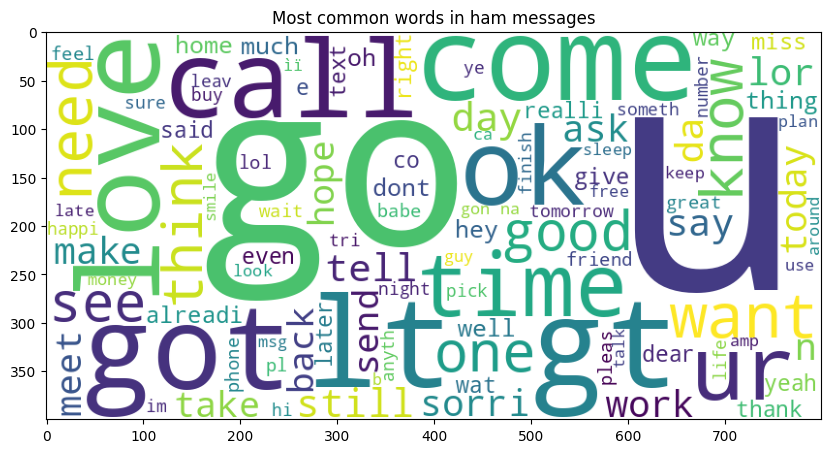

In [28]:
ham_wc = wc.generate(' '.join(data[data['target'] == 0]['transformed_text']))
plt.figure(figsize=(10, 6))
plt.imshow(ham_wc)
plt.title('Most common words in ham messages')

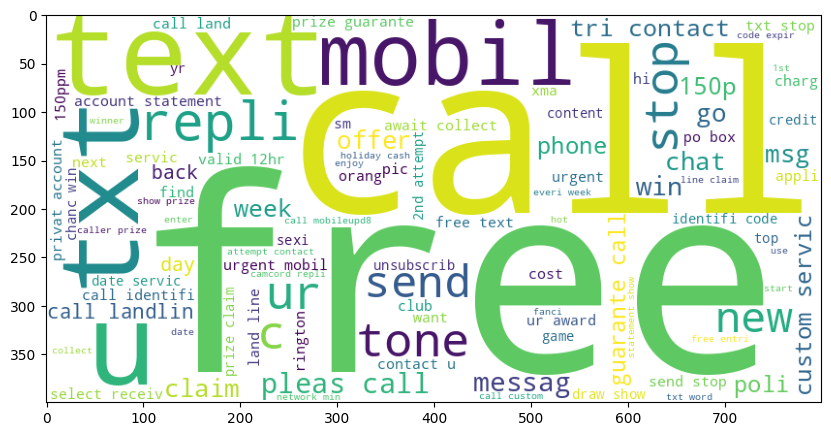

In [29]:
spam_wc = wc.generate(' '.join(data[data['target'] == 1]['transformed_text']))
plt.figure(figsize=(10, 6))
plt.imshow(spam_wc)

Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer() # default

In [56]:
X = data["transformed_text"]
y = data["target"]

In [57]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
features = vectorizer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    features,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=2024,
)

# choose highest freq label in neighbors
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
from sklearn.metrics import classification_report

print(f"train accuracy {model.score(X_train, y_train)}")
print(f"test accuracy {model.score(X_test, y_test)}")
print(f"classifying {model}")

pred = model.predict(X_test)
print(classification_report(y_test, pred, zero_division=True))

train accuracy 0.9136638452237001
test accuracy 0.8965183752417795
classifying KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       895
           1       1.00      0.23      0.37       139

    accuracy                           0.90      1034
   macro avg       0.95      0.62      0.66      1034
weighted avg       0.91      0.90      0.87      1034

